In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


#  Predict house prices using a variety of features like square footage, number of bedrooms, and location

 - Define the Problem Statement
- Objective: Predict house prices based on various features such as square footage, number of        bedrooms, location, and overall condition.
- Target Variable: SalePrice
- Type of Problem: Supervised Regression Problem

# 🏡 Ames Housing Dataset - Description
- The Ames Housing Dataset is a comprehensive dataset for predicting house prices in Ames, Iowa. It was created by Dean De Cock as an improved alternative to the classic Boston Housing dataset, providing a richer set of real estate data.

This dataset is widely used in machine learning and regression modeling to explore the factors influencing house prices.

#  Dataset Overview
- The Ames Housing Dataset is a comprehensive real estate dataset containing detailed information on 2,930 residential properties in Ames, Iowa. Created by Dean De Cock, it serves as an improved alternative to the classic Boston Housing dataset and is widely used for house price prediction and regression modeling. With 82 features, the dataset includes various aspects of a house, such as lot size, zoning classification, building type, construction year, overall quality, number of rooms, basement and garage details, and additional amenities like fireplaces, pools, and porches. It also includes market-related attributes like the sale year, sale type, and sale condition, which help in understanding real estate price trends. The target variable, SalePrice, represents the final selling price of each house. Due to its rich and diverse feature set, the Ames Housing Dataset is an excellent resource for machine learning, data analysis, and feature engineering, making it a popular choice for researchers and data scientists working on real estate price modeling.

# Import The Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [72]:
df1 = pd.read_csv("/kaggle/input/ames-housing-dataset/AmesHousing.csv")
df1.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [73]:
df1.shape

(2930, 82)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# Finding Missing values

In [75]:
# Check missing values
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


# Filling the missing values

In [76]:
# Fill missing numerical values with median
num_imputer = SimpleImputer(strategy="median")
df1[df1.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df1.select_dtypes(include=['number']))

# Fill missing categorical values with most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
df1[df1.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df1.select_dtypes(include=['object']))

# Verify no missing values remain
print(df1.isnull().sum().sum())  

0


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   float64
 1   PID              2930 non-null   float64
 2   MS SubClass      2930 non-null   float64
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   float64
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [78]:
# Display summary statistics
print(df1.describe())

#print(df1.describe(include="object"))

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2930.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.019795   10147.921843   
std     845.96247  1.887308e+08    42.638025     21.326422    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     60.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     78.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2930.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.096928   
std        1.411026      1.111537    30.245361       20.860286    

# Label encoder

In [79]:
# Identify categorical columns
cat_cols = df1.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:       
    df1[col] = le.fit_transform(df1[col])  # categorical transform to numerical

df1.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1.0,526301100.0,20.0,5,141.0,31770.0,1,0,0,3,...,0.0,0,2,3,0.0,5.0,2010.0,9,4,215000.0
1,2.0,526350040.0,20.0,4,80.0,11622.0,1,0,3,3,...,0.0,0,2,3,0.0,6.0,2010.0,9,4,105000.0
2,3.0,526351010.0,20.0,5,81.0,14267.0,1,0,0,3,...,0.0,0,2,1,12500.0,6.0,2010.0,9,4,172000.0
3,4.0,526353030.0,20.0,5,93.0,11160.0,1,0,3,3,...,0.0,0,2,3,0.0,4.0,2010.0,9,4,244000.0
4,5.0,527105010.0,60.0,5,74.0,13830.0,1,0,0,3,...,0.0,0,2,3,0.0,3.0,2010.0,9,4,189900.0


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   float64
 1   PID              2930 non-null   float64
 2   MS SubClass      2930 non-null   float64
 3   MS Zoning        2930 non-null   int64  
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   float64
 6   Street           2930 non-null   int64  
 7   Alley            2930 non-null   int64  
 8   Lot Shape        2930 non-null   int64  
 9   Land Contour     2930 non-null   int64  
 10  Utilities        2930 non-null   int64  
 11  Lot Config       2930 non-null   int64  
 12  Land Slope       2930 non-null   int64  
 13  Neighborhood     2930 non-null   int64  
 14  Condition 1      2930 non-null   int64  
 15  Condition 2      2930 non-null   int64  
 16  Bldg Type        2930 non-null   int64  
 17  House Style   

# Remove outliers

In [81]:
def remove_outliers(df, columns):
    
    df_filtered = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where column value is outside the IQR range
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    
    return df_filtered

# Specify the numerical columns for outlier removal
columns_to_clean = ['SalePrice', 'Lot Area', 'Gr Liv Area', 'Garage Area']

# Remove outliers
df1_cleaned = remove_outliers(df1, columns_to_clean)

# Display the shape before and after removing outliers
print(f"Original dataset shape: {df1.shape}")
print(f"Cleaned dataset shape: {df1_cleaned.shape}")

Original dataset shape: (2930, 82)
Cleaned dataset shape: (2641, 82)


Text(0.5, 1.0, 'After Removing Outliers')

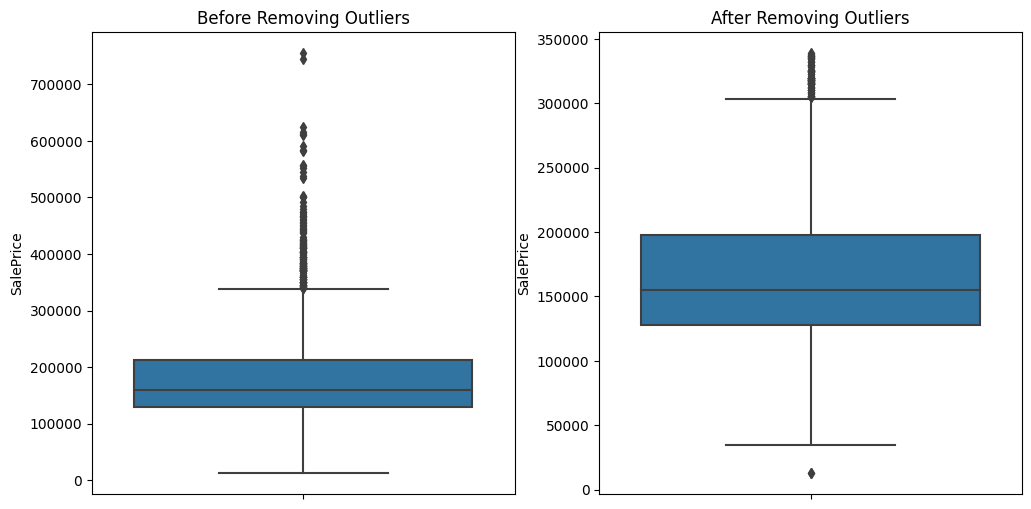

In [104]:
plt.figure(figsize=(12, 6))

# Boxplot BEFORE removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df1['SalePrice'])
plt.title("Before Removing Outliers")

# Boxplot AFTER removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df1_cleaned['SalePrice'])
plt.title("After Removing Outliers")

# observation
- To visualize the effect of outlier removal, we use boxplots before and after cleaning the data. The first subplot shows the distribution of SalePrice with potential outliers, while the second subplot displays the distribution after removing them. This comparison helps in understanding how outliers impact the dataset and ensures that the cleaned data is more representative of the underlying trends. The use of plt.tight_layout() ensures proper spacing between the plots for better readability.

# Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


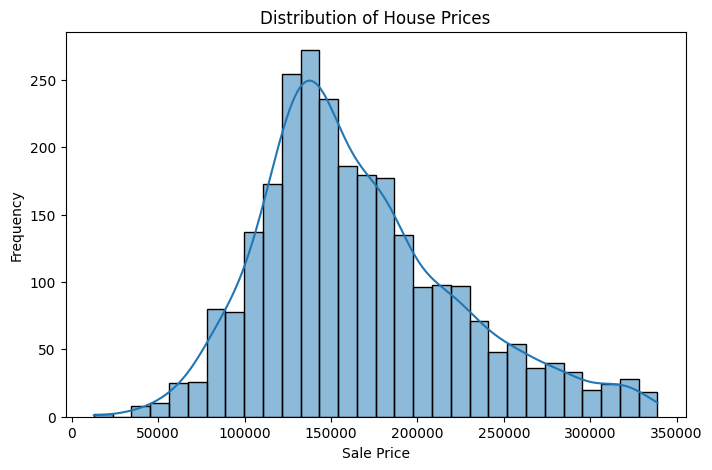

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(df1_cleaned['SalePrice'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# observation:
- The code generates a histogram with a Kernel Density Estimate (KDE) overlay for the SalePrice column in the df1_cleaned dataframe. It uses seaborn.histplot() to visualize the distribution of house prices with 30 bins. The plot includes labels for the x-axis, y-axis, and a title for clarity, displaying the frequency distribution of house prices.

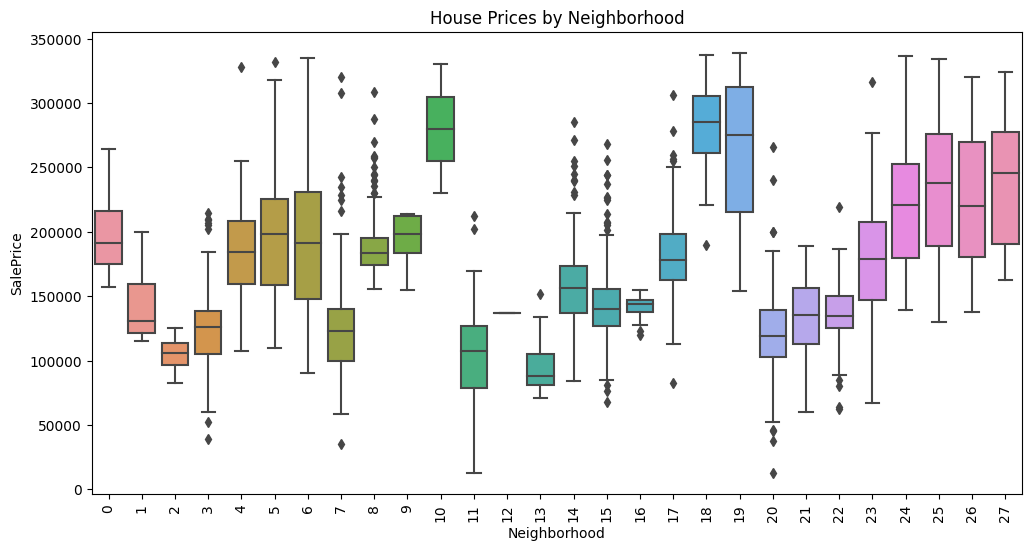

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df1_cleaned)
plt.xticks(rotation=90)
plt.title("House Prices by Neighborhood")
plt.show()

# observation:
- The code creates a boxplot using seaborn.boxplot() to visualize the distribution of SalePrice across different Neighborhood categories in the df1_cleaned dataframe. It sets the figure size to 12x6 for better readability, rotates the x-axis labels by 90 degrees to avoid overlap, and adds a title to the plot. This helps to compare house prices across various neighborhoods, showing the median, quartiles, and potential outliers.

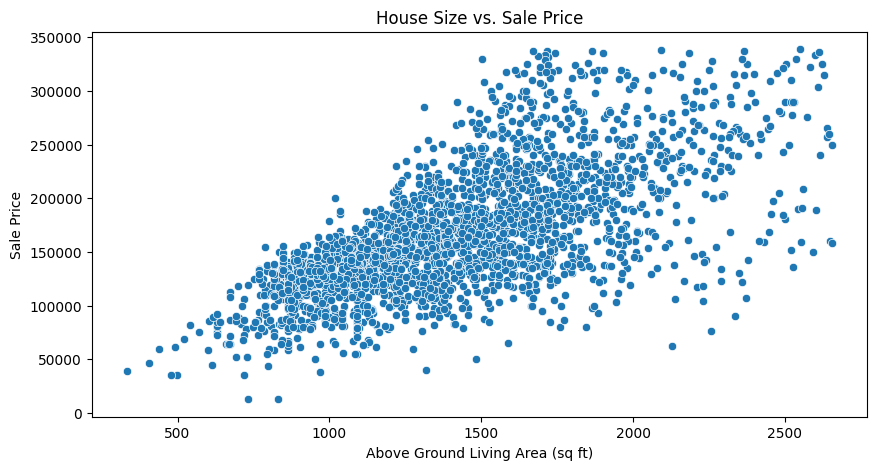

In [84]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df1_cleaned)
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("House Size vs. Sale Price")
plt.show()

# observation:
-The code generates a scatter plot using seaborn.scatterplot() to visualize the relationship between the Gr Liv Area (Above Ground Living Area in square feet) and SalePrice in the df1_cleaned dataframe. The plot has labels for the x-axis and y-axis, and a title, allowing you to observe how house size correlates with sale price. The figure size is set to 10x5 for better visibility.

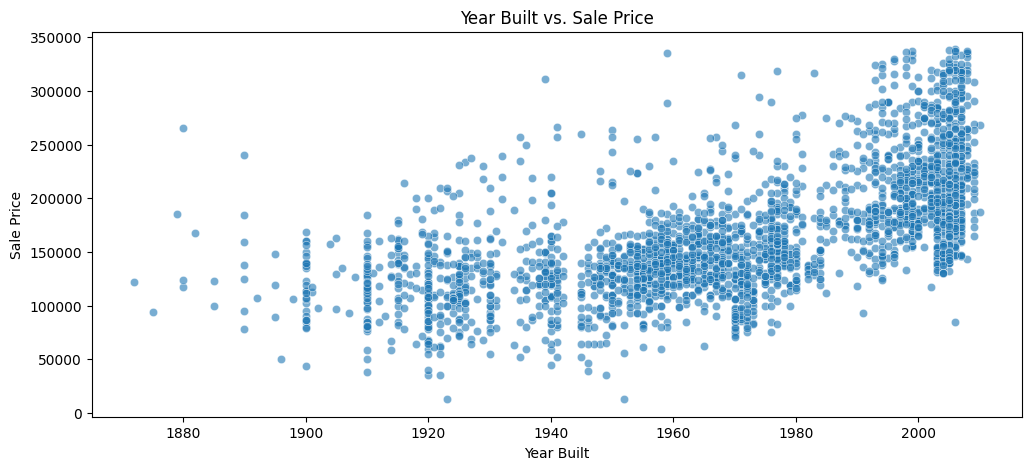

In [85]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="Year Built", y="SalePrice", data=df1_cleaned, alpha=0.6)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Year Built vs. Sale Price")
plt.show()

# observation:
-The code creates a scatter plot using seaborn.scatterplot() to explore the relationship between the Year Built and SalePrice in the df1_cleaned dataframe. The alpha=0.6 setting makes the points semi-transparent, helping to visualize overlapping points. The plot is sized at 12x5, with labels on both axes and a title, showing how the year a house was built influences its sale price.

In [86]:
# Identify categorical columns
categorical_cols = df1_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


# One Hot Encoding

In [87]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding using pandas
df1_cleaned = pd.get_dummies(df1_cleaned, columns=categorical_cols, drop_first=True)

print("Dataset after encoding:", df1_cleaned.shape)

Dataset after encoding: (2641, 82)


# Split Feature & Target

In [88]:
# This code splits the dataset into features (X) and target variable (y) for machine learning.
X = df1_cleaned.drop("SalePrice", axis=1)
y = df1_cleaned["SalePrice"]

- House prices often follow a right-skewed distribution. Applying np.log1p(y) can improve model performance.

In [89]:
y = np.log1p(df1_cleaned["SalePrice"])

# Split Training & Testing 

In [90]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize 

In [91]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression Models

## 1. Ridge Regression

In [92]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1)

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Metrics:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")



Ridge Regression Metrics:
MSE: 0.01
R-squared: 0.91


## 2. Lasso Regression

In [93]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")


Lasso Regression Metrics:
MSE: 0.04
R-squared: 0.67


## 3. Random Forest Regression

In [94]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Metrics:
MSE: 0.01
R-squared: 0.88


## 4. Gradient Boosting Regression

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")

Gradient Boosting Regressor Metrics:
MSE: 0.01
R-squared: 0.92


## 5. DecisionTree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")

Decision Tree Regressor Metrics:
MSE: 0.03
R-squared: 0.73


## Compare the Models Performance

In [97]:
# Combine results into a DataFrame
results = pd.DataFrame({
    'Model': [
       'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 
        'Decision Tree',
    ],
    'MSE': [mse_ridge, mse_lasso, mse_rf, mse_gbr, mse_dt,  ],
    'R-squared': [r2_ridge, r2_lasso, r2_rf, r2_gbr, r2_dt, ]
})

# Display results
print(results)

               Model       MSE  R-squared
0   Ridge Regression  0.011543   0.908976
1   Lasso Regression  0.041259   0.674637
2      Random Forest  0.014943   0.882164
3  Gradient Boosting  0.010386   0.918096
4      Decision Tree  0.033985   0.731993


# Visualize the performance

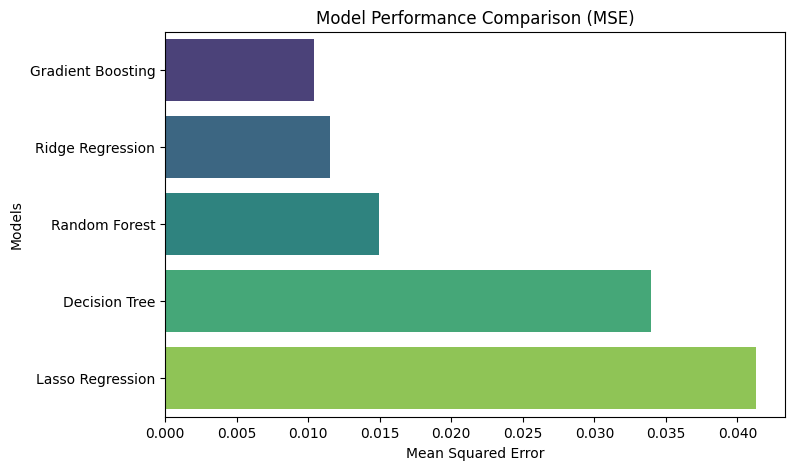

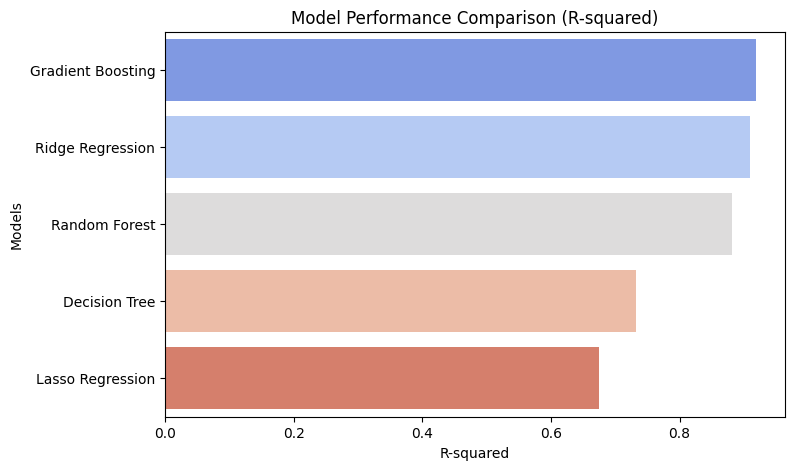

In [98]:
# Filter the results DataFrame for each metric
results_mse = results[['Model', 'MSE']].sort_values(by='MSE', ascending=True)
results_r2 = results[['Model', 'R-squared']].sort_values(by='R-squared', ascending=False)

# Plot MSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='MSE', y='Model', data=results_mse, palette='viridis')
plt.title('Model Performance Comparison (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Models')
plt.show()

# Plot R-squared comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='R-squared', y='Model', data=results_r2, palette='coolwarm')
plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('R-squared')
plt.ylabel('Models')
plt.show()

# Sort Scores in Ascending and Descending order 

In [99]:
# Sort by R-squared to identify the best regression model
print(results_r2.sort_values(by='R-squared', ascending=False))# descending order

# Sort by MSE to identify the best regression model
print(results_mse.sort_values(by='MSE', ascending=True)) # ascending order

               Model  R-squared
3  Gradient Boosting   0.918096
0   Ridge Regression   0.908976
2      Random Forest   0.882164
4      Decision Tree   0.731993
1   Lasso Regression   0.674637
               Model       MSE
3  Gradient Boosting  0.010386
0   Ridge Regression  0.011543
2      Random Forest  0.014943
4      Decision Tree  0.033985
1   Lasso Regression  0.041259


# Prediction
# -------------

## Lower MAE & MSE 🟢 → Better model (indicates lower error).
## Higher R² Score 🔵 → Better model (closer to 1 means better fit).

# Best Model: Gradient Boosting Regressor
- Highest R² Score (0.918096) → Best at explaining variance in house prices
- Lowest MSE (0.010386) → Lowest prediction error

# Feature Importance (Random Forest)

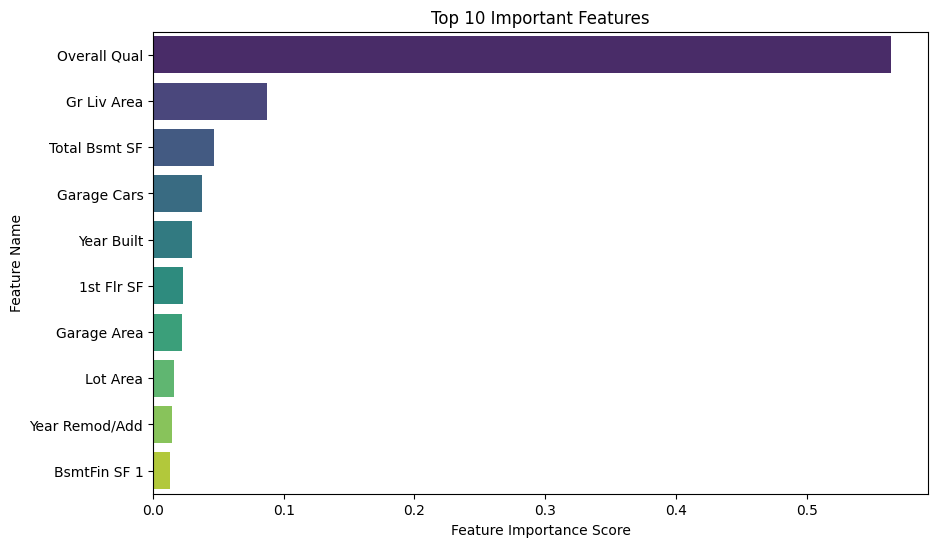

In [100]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_
feature_names = X.columns

# Sort and plot feature importance
sorted_indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()


# Conclusion

In this case study, we developed a house price prediction model using various machine learning techniques, leveraging the Ames Housing dataset. Our objective was to predict house prices based on key features such as square footage, number of bedrooms, location, and overall condition. Through a structured approach, we performed data preprocessing, including handling missing values, encoding categorical variables, scaling numerical features, and removing outliers using the Interquartile Range (IQR) method to improve model reliability.

We implemented multiple regression models, including Ridge Regression, Lasso Regression, Decision Tree, Random Forest, and Gradient Boosting Regressor, and evaluated their performance using Mean Squared Error (MSE) and R-squared (R²) scores. Among these, the Gradient Boosting Regressor performed the best, achieving the highest R² score (0.92) and the lowest MSE, indicating its strong ability to explain variance in house prices while minimizing prediction error.

Furthermore, feature importance analysis revealed that attributes such as overall house quality, above-ground living area, and neighborhood location significantly impact house prices. The insights gained from this study can help homebuyers, real estate agents, and property investors make data-driven decisions regarding pricing and valuation. Overall, our study highlights the effectiveness of machine learning in real estate pricing and provides a foundation for further model optimization and integration with real-world housing markets.